In [1]:
# Project 2 - Game of Life: Create a class for the Game of Life and then build the game around it

import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
n = 20
board = np.random.choice(2, (n, n), p=[0.8, 0.2])
cmap = colors.ListedColormap(['gray', 'black'])

In [3]:
neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

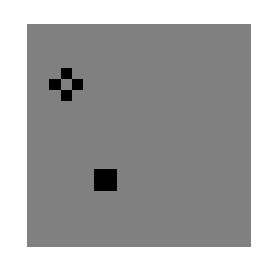

In [4]:
for i in range(1000):
    new_board = board.copy()
    for row in range(n):
        for column in range(n):
            count = 0
            new_neighbors = list(zip(np.array(neighbors)[:, 0] + row, np.array(neighbors)[:, 1] + column))
            for i in range(8):
                r, c = new_neighbors[i]
                if not any(i in [r, c] for i in [-1, n]):
                    if board[r][c] > 0: count += 1
                    if count == 4: break
            if board[row][column] > 0:
                if count in [2, 3]:
                    # 2 veya 3 komsulugu canli olan tum canli hucreler sonraki durumda da canliligini korur.
                    new_board[row][column] += 1 if new_board[row][column] < 1 else 0
                else:
                    # 2'den az canli komsulugu olan canli hucreler olur.
                    new_board[row][column] -= 1 if new_board[row][column] > 0 else 0
            elif count == 3:
                # Tam 3 komsulugu canli olan olu hucreler canlanir.
                new_board[row][column] = 1
    board = new_board
    plt.matshow(board, cmap=cmap)
    display.clear_output(wait=True)
    plt.grid(False)
    plt.axis('off')
    display.display(plt.gcf())    
    plt.close()

In [5]:
# Yararlanilan kaynaklar: https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/
# https://medium.com/@martin.robertandrew/conways-game-of-life-in-python-2900a6dcdc97
# https://codereview.stackexchange.com/questions/40886/conways-game-of-life-in-python
# https://fiftyexamples.readthedocs.io/en/latest/life.html